In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# Read the excel file into a pandas DataFrame

countyData = pd.read_excel('floridacounty.xlsx')

list(countyData.columns)

['Time_Frame',
 'GeographyA',
 'County_GeographyA',
 'Geography B',
 'County_GeographyB',
 'Flow from Geography B to Geography A',
 'Counterflow from Geography A to Geography B1',
 'Net Migration from Geography B to Geography A1',
 'Average Home Price',
 'Umemployment']

In [3]:
countyData['Average Home Price'].apply(np.ceil)

0        166247.0
1        166247.0
2        166247.0
3        166247.0
4        166247.0
           ...   
22603     94179.0
22604     94179.0
22605     94179.0
22606     94179.0
22607     94179.0
Name: Average Home Price, Length: 22608, dtype: float64

In [4]:
countyData=countyData.drop('Umemployment', axis =1)

In [5]:
dummy = ["Time_Frame",'GeographyA',
 'County_GeographyA',
 'Geography B',
 'County_GeographyB']


newCounty = pd.get_dummies(countyData, columns= dummy)
newCounty.head()


,Flow from Geography B to Geography A,Counterflow from Geography A to Geography B1,Net Migration from Geography B to Geography A1,Average Home Price,Time_Frame_2014-2018,GeographyA_Florida,County_GeographyA_Alachua County,County_GeographyA_Baker County,County_GeographyA_Bay County,County_GeographyA_Bradford County,...,County_GeographyB_Yauco Municipio,County_GeographyB_Yavapai County,County_GeographyB_Yazoo County,County_GeographyB_Yell County,County_GeographyB_Yellowstone County,County_GeographyB_Yolo County,County_GeographyB_York County,County_GeographyB_Yuba County,County_GeographyB_Yuma County,County_GeographyB_Zapata County
0,20,0,20,166246.666667,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14,0,14,166246.666667,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,10,-10,166246.666667,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,155,-141,166246.666667,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14,76,-62,166246.666667,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
columns = newCounty.drop("Net Migration from Geography B to Geography A1", axis=1)
list(columns)

['Flow from Geography B to Geography A',
 'Counterflow from Geography A to Geography B1',
 'Average Home Price',
 'Time_Frame_2014-2018',
 'GeographyA_Florida',
 'County_GeographyA_Alachua County',
 'County_GeographyA_Baker County',
 'County_GeographyA_Bay County',
 'County_GeographyA_Bradford County',
 'County_GeographyA_Brevard County',
 'County_GeographyA_Broward County',
 'County_GeographyA_Calhoun County',
 'County_GeographyA_Charlotte County',
 'County_GeographyA_Citrus County',
 'County_GeographyA_Clay County',
 'County_GeographyA_Collier County',
 'County_GeographyA_Columbia County',
 'County_GeographyA_DeSoto County',
 'County_GeographyA_Dixie County',
 'County_GeographyA_Duval County',
 'County_GeographyA_Escambia County',
 'County_GeographyA_Flagler County',
 'County_GeographyA_Franklin County',
 'County_GeographyA_Gadsden County',
 'County_GeographyA_Gilchrist County',
 'County_GeographyA_Glades County',
 'County_GeographyA_Gulf County',
 'County_GeographyA_Hamilton County'

In [7]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = newCounty.drop("Net Migration from Geography B to Geography A1", axis=1).values
y = newCounty["Net Migration from Geography B to Geography A1"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (22608, 1722) (22608, 1)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [9]:
# Create the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [10]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

((0.32688349437195796, 'Flow from Geography B to Geography A'), (-0.5227001340805729, 'Counterflow from Geography A to Geography B1'), (565.714543180444, 'Average Home Price'), (288234761.24157757, 'Time_Frame_2014-2018'), (-758982328.9246887, 'GeographyA_Florida'), (28174916.319828536, 'County_GeographyA_Alachua County'), (38186206.7463466, 'County_GeographyA_Baker County'), (15240001.048939412, 'County_GeographyA_Bay County'), (57058967.21271861, 'County_GeographyA_Bradford County'), (20214809.38788081, 'County_GeographyA_Brevard County'), (-7707056.4367619455, 'County_GeographyA_Broward County'), (74512124.98633581, 'County_GeographyA_Calhoun County'), (18102798.281640746, 'County_GeographyA_Charlotte County'), (49999869.28471131, 'County_GeographyA_Citrus County'), (19211432.247932658, 'County_GeographyA_Clay County'), (-62195038.95266671, 'County_GeographyA_Collier County'), (49478370.560075805, 'County_GeographyA_Columbia County'), (61056064.473352104, 'County_GeographyA_DeSoto C

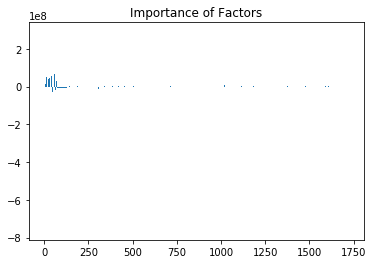

In [18]:
#print('Weight coefficients: ', model.coef_)
#print('y-axis intercept: ', model.intercept_)
importance=model.coef_[0]

features_importance = []

for i, v in enumerate(importance):
    features_importance.append(v)


features_importance_names = zip(features_importance, columns)
print(tuple(features_importance_names))    
plt.bar([x for x in range(len(importance))], importance)
plt.title("Importance of Factors")
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 88637700511.64937
R-squared (R2 ): -1603623.3271062735


In [20]:
model.score(X_test, y_test)

-1603623.3271062735

In [21]:
rsquared = 1 - (1-model.score(X_test, y_test))*(len(y)-1)/(len(y)-X.shape[1]-1)
rsquared

-1735844.5907537239

In [22]:
# Note: we have to transform our min and max values 
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.]]
Max X Value: [[563468.0625]]


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 88637700511.64937
R-squared (R2 ): -1603623.3271062735


In [24]:
model.score(X_test, y_test)

-1603623.3271062735

In [30]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = newCounty['Average Home Price'].values.reshape(-1, 1) 
y = newCounty["Net Migration from Geography B to Geography A1"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (22608, 1) (22608, 1)


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

((-3.7451769030586923e-05,),)


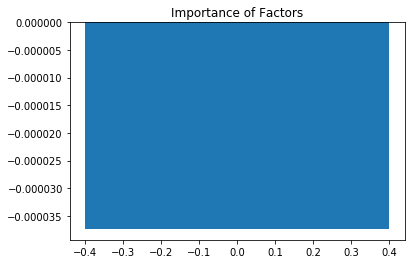

In [33]:
importance=model.coef_[0]

features_importance = []

for i, v in enumerate(importance):
    features_importance.append(v)


features_importance_names = zip(features_importance)
print(tuple(features_importance_names))    
plt.bar([x for x in range(len(importance))], importance)
plt.title("Importance of Factors")
plt.show()

In [34]:
# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 55280.202373393906
R-squared (R2 ): -0.0001238391973132913


In [35]:
model.score(X_test, y_test)
rsquared = 1 - (1-model.score(X_test, y_test))*(len(y)-1)/(len(y)-X.shape[1]-1)
rsquared

-0.0001680807189976541